# Exploring Student Habits and Academic Performance


## Introduction

For my final project, I chose to work with the **"Student Habits and Performance"** dataset. It includes information on 1,000 students, covering their daily routines, personal backgrounds, and exam scores. I picked this dataset because I’ve always been curious about how habits like study time, sleep, or social media usage affect academic performance. This analysis could be helpful for students and educators looking to better understand what drives school success.

## Load Dataset

We start by loading the **Student Habits and Performance** dataset, which contains information on 1,000 students. This includes their study habits, personal and academic backgrounds, and final exam scores. This step helps us inspect the structure of the dataset before diving into cleaning or analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## Data Preprocessing and Cleaning

The dataset was already clean with no missing values and included both numerical and categorical variables like:
- Gender
- Part-time job status
- Parental education level
- Diet quality

Here's what I did:
- Categorical variables were converted to category types.
- Numerical features were scaled to bring them onto a similar range for modeling.


In [18]:
# Convert categorical columns
df['diet_quality'] = df['diet_quality'].astype('category')
df['parental_education_level'] = df['parental_education_level'].astype('category')
df['internet_quality'] = df['internet_quality'].astype('category')

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Scaled numerical values
X = df.drop(columns=['student_id', 'exam_score'])
y = df['exam_score']

categorical_features = X.select_dtypes(include=['category']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   object  
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   object  
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   category
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       909 non-null    category
 12  internet_quality               1000

## Exploratory Data Analysis (EDA)

### Key Findings from EDA:

- Most exam scores were between **60 and 100**, with a few much lower.
- Students who **studied more**, **slept more**, and had **better attendance** performed better.
- Students who spent more time on **Netflix** or **social media** tended to score lower.

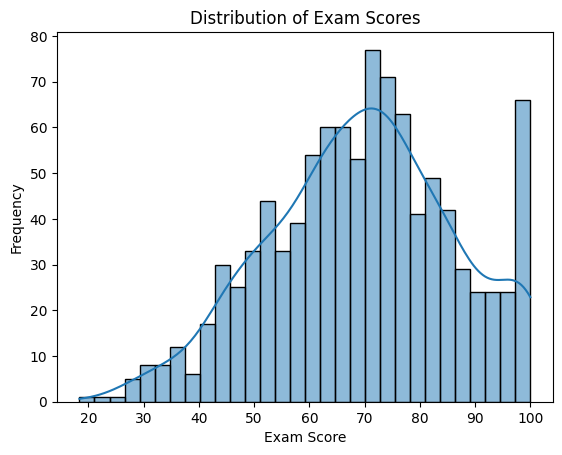

In [19]:
# Distribution of Exam Scores
sns.histplot(df['exam_score'], kde=True, bins=30)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

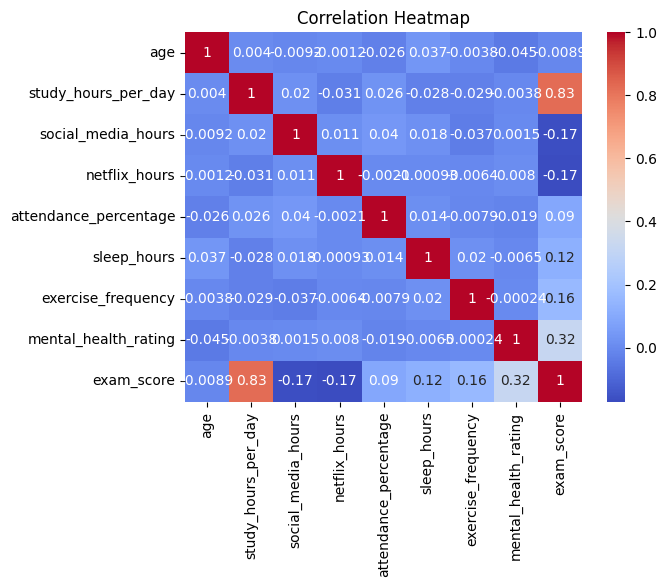

In [20]:
# Correlation heatmap for numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Machine Learning Modeling

I built two models to predict exam scores:
1. **Linear Regression**
2. **Random Forest Regressor**

#### Model Performance

**Linear Regression**  
- RMSE: **5.15**  
- R²: **0.897**  

Simple, interpretable, and highly accurate.  

**Random Forest Regressor**  
- RMSE: **6.21**  
- R²: **0.850**  

Performed well, but slightly less accurate. Possibly overfitting or unnecessary complexity given the linear trends.

**Conclusion**: Linear Regression was the better fit for this dataset.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor(random_state=42))])

lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

print('Linear Regression RMSE:', root_mean_squared_error(y_test, y_pred_lr))
print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print('Random Forest RMSE:', root_mean_squared_error(y_test, y_pred_rf))
print('Random Forest R²:', r2_score(y_test, y_pred_rf))

Linear Regression RMSE: 5.138514326866493
Linear Regression R²: 0.8970306806080531
Random Forest RMSE: 6.217991378652758
Random Forest R²: 0.8492237527328022


## Final Thoughts & Learnings

This project helped reinforce the key skills from the course:

- **Clean data = better models**: Preprocessing really matters.
- **Correlation helps**: Knowing what features relate to the target helps you focus.
- **Simple is powerful**: Linear Regression worked very well here.

**Future Ideas**:
- Add features like past grades or motivation level.
- Explore time-based trends in performance.
- Use advanced models to analyze feature importance more deeply.
